## Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Dropout

## Rescaling Images

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_normalize = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_normalize = ImageDataGenerator(rescale=1./255)
val_normalize = ImageDataGenerator(rescale=1./255)

## Load images

In [7]:
train_set = train_normalize.flow_from_directory(directory='dataset/Train/Train',target_size=(225,225),class_mode="categorical")
val_set = val_normalize.flow_from_directory(directory="dataset/Test/Test",target_size=(225,225),class_mode="categorical")
test_set = test_normalize.flow_from_directory(directory="dataset/Validation/Validation",target_size=(225,225),class_mode="categorical")

Found 1322 images belonging to 3 classes.


Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [8]:
# Print the classes and their corresponding indices
print("Classes and Indices:")
for class_name, class_index in train_set.class_indices.items():
    print(f"Class: {class_name}, Index: {class_index}")


Classes and Indices:
Class: Healthy, Index: 0
Class: Powdery, Index: 1
Class: Rust, Index: 2


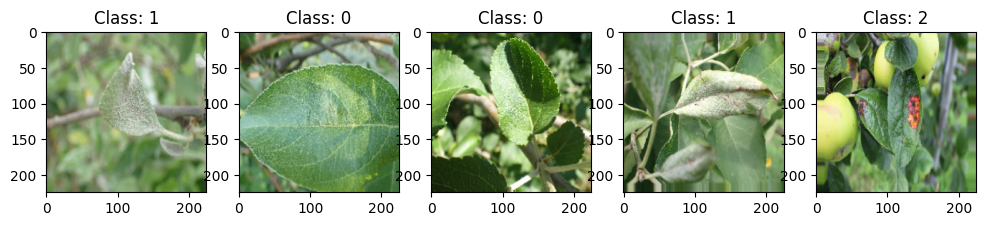

In [10]:
import matplotlib.pyplot as plt


def plot_images(generator, num_images=5):
    images, labels = next(generator)

    # Plot the images
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(f"Class: {labels[i].argmax()}")

    plt.show()

# Use the function to plot images
plot_images(train_set, num_images=5)


## CNN Model

In [13]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(225,225,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

In [14]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


## categorical loss function with adam optimizer

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Fit the dataset into model

In [16]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_set, epochs=50, batch_size=32, validation_data=test_set, callbacks=[early_stopping])

c:\Users\princ\OneDrive\Pictures\Documents\Plant-Disease-Detection\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.4068 - loss: 2.6960 - val_accuracy: 0.5667 - val_loss: 0.8435
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.6709 - loss: 0.7164 - val_accuracy: 0.6667 - val_loss: 0.6797
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - accuracy: 0.7031 - loss: 0.6396 - val_accuracy: 0.6833 - val_loss: 0.6432
Epoch 4/50
30/42 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7159 - loss: 0.6416

KeyboardInterrupt: 

## Visualize the performance

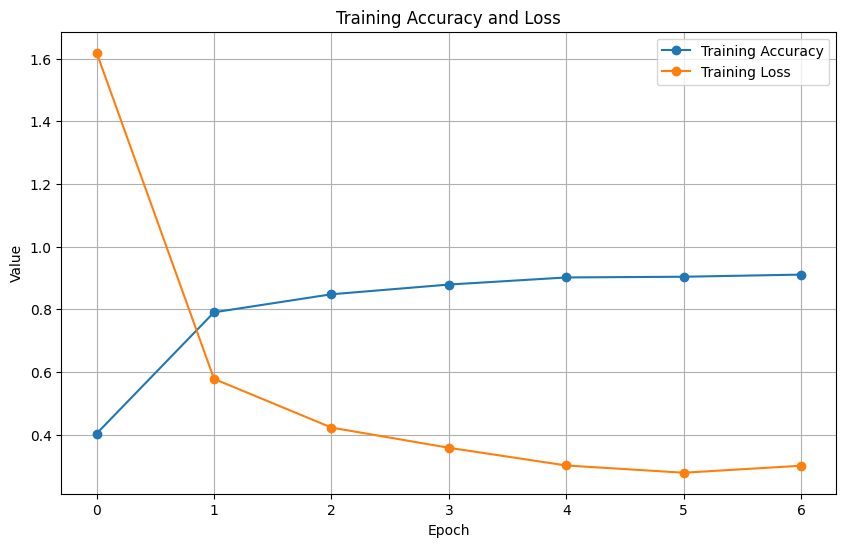

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the 'history' object from your model training

# Plot Training Accuracy and Loss in one plot
plt.figure(figsize=(10, 6))

# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')

# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss', marker='o')

plt.title('Training Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.evaluate(val_set)


5/5 [==============================] - 18s 3s/step - loss: 0.3284 - accuracy: 0.8867


[0.328426331281662, 0.8866666555404663]

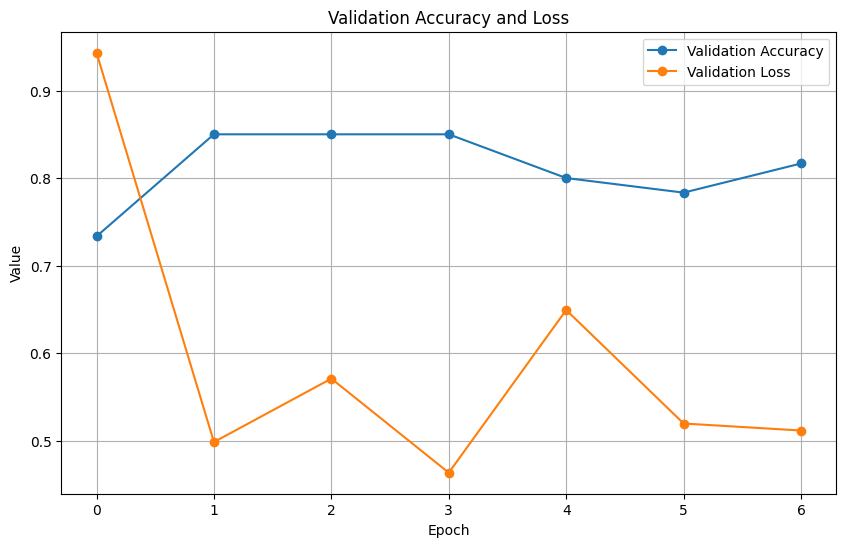

In [ ]:
# prompt: plot validation accuracy and loss

# Plot Validation Accuracy and Loss in one plot
plt.figure(figsize=(10, 6))

# Plot Validation Accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')

# Plot Validation Loss
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')

plt.title('Validation Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.evaluate(test_set)

2/2 [==============================] - 8s 2s/step - loss: 0.5114 - accuracy: 0.8167


[0.5114185810089111, 0.8166666626930237]

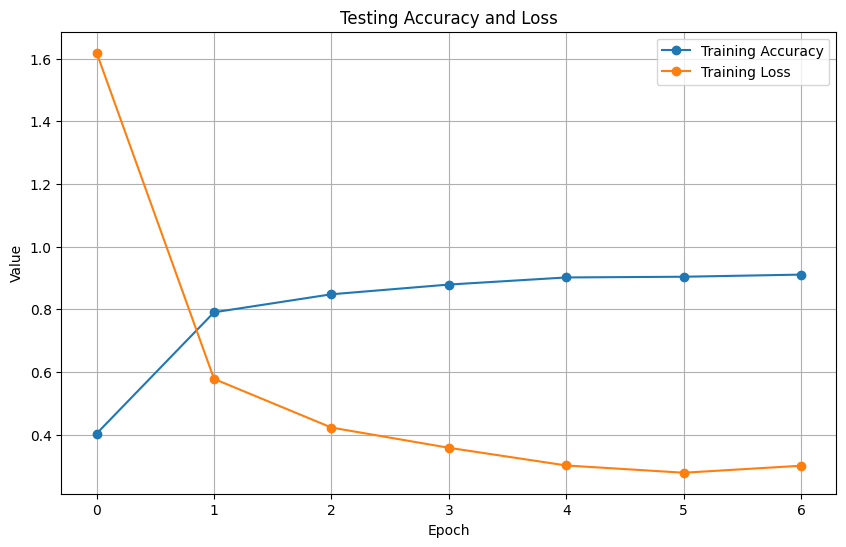

In [ ]:
# prompt: plot tesing accuracy and loss

# Plot Testing Accuracy and Loss in one plot
plt.figure(figsize=(10, 6))

# Plot Testing Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')

# Plot Testing Loss
plt.plot(history.history['loss'], label='Training Loss', marker='o')

plt.title('Testing Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:


import pandas as pd

# Create a DataFrame with the desired columns
df = pd.DataFrame(columns=['Training Accuracy', 'Training Loss', 'Validation Accuracy', 'Validation Loss','Testing Accuracy', 'Testing Loss'])

# Fill the DataFrame with the corresponding values from the history object
df['Training Accuracy'] = history.history['accuracy']
df['Training Loss'] = history.history['loss']
df['Validation Accuracy'] = history.history['val_accuracy']
df['Validation Loss'] = history.history['val_loss']
df['Testing Accuracy'] = model.evaluate(test_set)[1]
df['Testing Loss'] = model.evaluate(test_set)[0]

# Print the DataFrame
print(df.to_string())


2/2 [==============================] - 7s 2s/step - loss: 0.5114 - accuracy: 0.8167
   Training Accuracy  Training Loss  Validation Accuracy  Validation Loss  Testing Accuracy  Testing Loss
0           0.403177       1.619087             0.733333         0.943255          0.816667      0.511419
1           0.790469       0.577703             0.850000         0.498248          0.816667      0.511419
2           0.847958       0.422407             0.850000         0.570752          0.816667      0.511419
3           0.878971       0.357860             0.850000         0.463183          0.816667      0.511419
4           0.901664       0.301379             0.800000         0.649165          0.816667      0.511419
5           0.903933       0.278264             0.783333         0.519438          0.816667      0.511419
6           0.910741       0.300593             0.816667         0.511419          0.816667      0.511419


## Prediction

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

classes =train_set.class_indices
icd={i:j for j,i in classes.items()}
def output(location):
    img=load_img(location,target_size=(225,225,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    predict_x=model.predict(img)
    classes_x=np.argmax(predict_x,axis=1)
    print ('Pridicted Class',icd[classes_x[0]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

classes =train_set.class_indices
icd={i:j for j,i in classes.items()}
def predict_and_display(images):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))

    for i, location in enumerate(images):
        img = load_img(location, target_size=(225, 225, 3))
        img_array = img_to_array(img)
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model_resnet.predict(img_array)
        predicted_class = icd[np.argmax(prediction, axis=1)[0]]

        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f'Predicted: {predicted_class}')

    plt.show()



In [ ]:
# prompt: find the f1 recall precession and confsion matrixand accuracy

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

# Get predictions for the validation set
y_pred = model.predict(val_set)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels
y_true = val_set.classes

# Calculate and print the performance metrics
f1 = f1_score(y_true, y_pred_classes, average="macro")
recall = recall_score(y_true, y_pred_classes, average="macro")
precision = precision_score(y_true, y_pred_classes, average="macro")
accuracy = accuracy_score(y_true, y_pred_classes)
conf_matrix = confusion_matrix(y_true, y_pred_classes)

print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


5/5 [==============================] - 17s 3s/step
F1 Score: 0.3599973573676658
Recall: 0.3666666666666667
Precision: 0.36330584838047525
Accuracy: 0.36666666666666664
Confusion Matrix:
[[25 12 13]
 [18 18 14]
 [24 14 12]]


In [ ]:
# prompt: draw the confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix from the previous code
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

# Set labels and title
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [1]:
test_img='/content/drive/MyDrive/Projects/plant-disease-prediction/dataset/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg'
pic=load_img(test_img,target_size=(225,225,3))
plt.imshow(pic)
output(test_img)

NameError: name 'load_img' is not defined